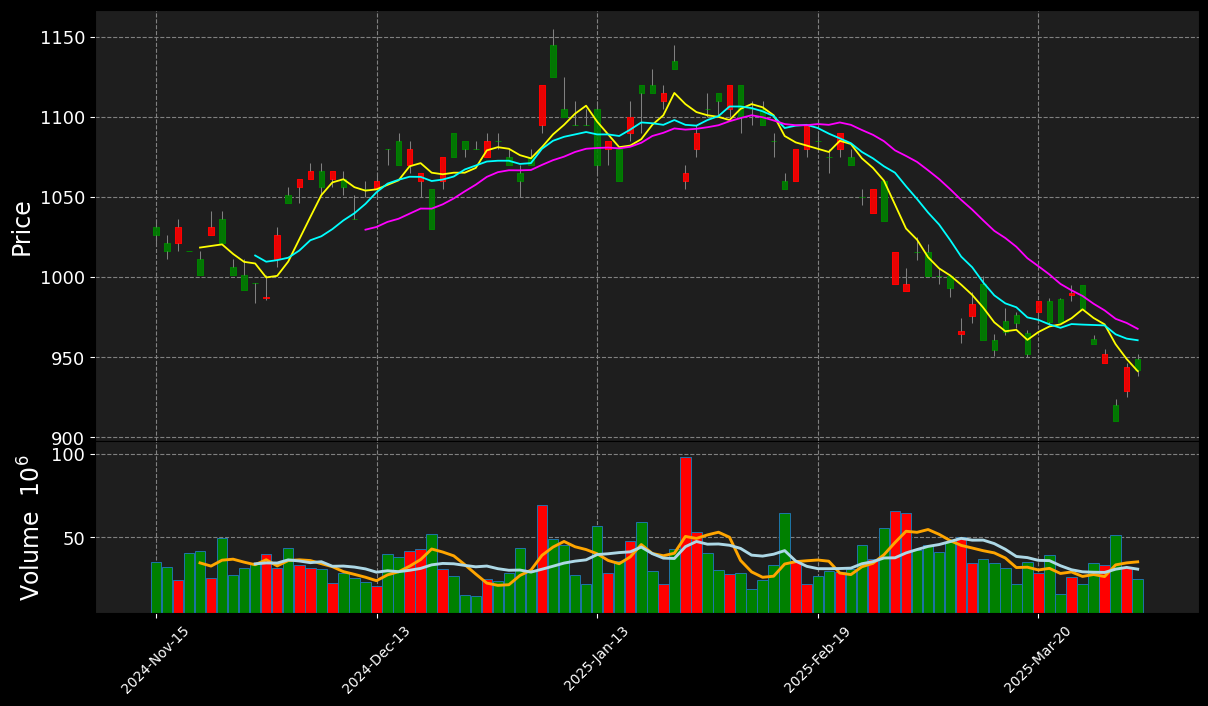

In [ ]:
import pandas as pd
import mplfinance as mpf

df = pd.read_csv('../data/processed/TSMC_2330TW_90d.csv', index_col='Date', parse_dates=True)

# Create a volume moving average layer (drawn in the volume panel, that is, panel=1)
vol_ma5_plot  = mpf.make_addplot(df['Vol_ma_5'], panel=1, color='orange')
vol_ma10_plot = mpf.make_addplot(df['Vol_ma_10'], panel=1, color='lightblue')

Kstyle = mpf.make_mpf_style(
    base_mpf_style='nightclouds',
    rc={'axes.labelsize': 17, 'ytick.labelsize': 13},
    marketcolors=mpf.make_marketcolors(
        up='red', down='green',
        edge='inherit',
        wick='gray',
        volume='inherit',
    ),
    facecolor='#1e1e1e',  # Background dark gray
    edgecolor='black',
    gridcolor='gray',
)

mpf.plot(
    df,
    type='candle',
    volume=True,
    style=Kstyle,
    mav=(5, 10, 20),
    mavcolors=['yellow', 'cyan', 'magenta'],
    addplot=[vol_ma5_plot, vol_ma10_plot],
    figratio=(16, 9), figscale=1.5
)